In [1]:
import pandas as pd
import plotnine as p9
import numpy as np
import matplotlib as mpl

# Force figure and saved figure backgrounds to white
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['savefig.facecolor'] = 'white'


In [6]:
results_df = pd.read_csv('Data/cs_aarhus/cs_analysis_results.csv')

In [3]:
results_df

,idx,layer,model,estimand,mean,median,true,bias,std,RMSE,RMSE_rel,MAE,MAPE,q025,q975,covering,mean_ind_cover,w_dist
0,0,lunch,true_net,stoch,2.23979,2.16616,2.24388,-0.00409,0.06910,0.06922,0.03085,0.02313,0.01082,2.104375,2.377483,True,1.00000,0.700302
1,0,lunch,agg_or,stoch,1.71720,1.65770,2.24388,-0.52668,0.22371,0.57222,0.25501,0.57561,0.24282,1.272639,2.144834,False,0.40984,3.901304
2,0,lunch,agg_and,stoch,1.21803,1.19278,2.24388,-1.02585,0.10723,1.03144,0.45967,1.02585,0.43317,1.004714,1.426404,False,0.03279,3.429053
3,0,lunch,MWG,stoch,2.27705,2.19528,2.24388,0.03317,0.15711,0.16057,0.07156,0.30792,0.14227,1.999859,2.595699,True,0.88525,1.450221
4,1,lunch,true_net,stoch,2.07702,2.00825,2.15457,-0.07755,0.09883,0.12563,0.05831,0.07769,0.03357,1.885274,2.270923,True,1.00000,0.657855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,98,work,MWG,stoch,2.97897,2.87083,2.53754,0.44143,0.19684,0.48333,0.19047,0.60157,0.27915,2.608910,3.361014,False,0.78689,3.055151
1596,99,work,true_net,stoch,2.67752,2.35354,2.69716,-0.01965,0.05337,0.05687,0.02109,0.03197,0.01430,2.572253,2.782260,True,1.00000,0.638576
1597,99,work,agg_or,stoch,2.78789,2.58769,2.69716,0.09073,0.28741,0.30139,0.11174,0.73971,0.28653,2.227386,3.345407,True,0.44262,3.150610
1598,99,work,agg_and,stoch,1.52339,1.50379,2.69716,-1.17377,0.16246,1.18496,0.43934,1.18372,0.37714,1.200787,1.845410,False,0.18033,4.129977


In [7]:
model_rename = {
    "true_net": "True",
    "MWG": "MWG",
    "agg_or": "OR",
    "agg_and": "AND",
}

results_df["model"] = results_df["model"].replace(model_rename)
results_df["model"] = pd.Categorical(results_df["model"], categories=model_rename.values(), ordered=True)


summary_df = (
    results_df
    .groupby(["layer", "model"])
    .agg(
        mean_RMSE_rel=("RMSE_rel", "mean"),
        mean_RMSE_rel_std=("RMSE_rel", "std"),
        rmse_rel_q5=("RMSE_rel", lambda x: np.percentile(x, 5)),
        rmse_rel_q95=("RMSE_rel", lambda x: np.percentile(x, 95)),

        mean_MAPE = ("MAPE", "mean"),
        median_MAPE = ("MAPE", "median"),
        mean_MAPE_std = ("MAPE", "std"),
        mape_q5 = ("MAPE", lambda x: np.percentile(x, 5)),
        mape_q95 = ("MAPE", lambda x: np.percentile(x, 95)),
       
       
        cover = ("covering", "mean"),
        ind_cover = ("mean_ind_cover", "mean"),

        w_dist = ("w_dist", "mean"),

        mean = ("mean", "mean"),
        median = ("median", "median"),
        std = ("std", "mean"),
        true = ("true", "mean"),
        true_std = ("true", "std"),

        mean_975 = ("q975", "mean"),
        mean_025 = ("q025", "mean"),

        bias = ("bias", "mean"),
        bias_std = ("bias", "std"),
        )
    .reset_index()
)

summary_df


C:\Users\bar21\AppData\Local\Temp\ipykernel_704\1463671403.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,layer,model,mean_RMSE_rel,mean_RMSE_rel_std,rmse_rel_q5,rmse_rel_q95,mean_MAPE,median_MAPE,mean_MAPE_std,mape_q5,...,w_dist,mean,median,std,true,true_std,mean_975,mean_025,bias,bias_std
0,facebook,True,0.051789,0.018529,0.030316,0.089330,0.032225,0.028715,0.018622,0.010808,...,0.758182,1.959054,1.578870,0.076053,1.977351,0.049563,2.107968,1.809560,-0.018297,0.073875
1,facebook,MWG,0.297168,0.120530,0.160499,0.512915,0.411517,0.374440,0.137046,0.277332,...,4.276762,2.184339,2.045425,0.378370,1.977351,0.049563,2.922445,1.486659,0.206987,0.456539
2,facebook,OR,0.234652,0.101611,0.141876,0.447441,0.411086,0.378490,0.119601,0.297620,...,3.456512,2.072509,1.968700,0.297881,1.977351,0.049563,2.653146,1.485612,0.095158,0.398634
3,facebook,AND,0.443476,0.105455,0.286816,0.613183,0.370078,0.347940,0.077703,0.284323,...,5.699442,1.119821,1.091490,0.172261,1.977351,0.049563,1.457418,0.781820,-0.857530,0.221488
4,leisure,True,0.067179,0.021468,0.042860,0.107592,0.040162,0.033670,0.027220,0.010063,...,0.948090,1.529743,1.466205,0.077631,1.530225,0.038913,1.682741,1.376493,-0.000482,0.073792
5,leisure,MWG,0.189015,0.054602,0.111832,0.286481,0.168863,0.150320,0.047276,0.120104,...,2.842064,1.510631,1.470415,0.211958,1.530225,0.038913,1.937912,1.127561,-0.019594,0.204076
6,leisure,OR,0.264452,0.120831,0.122947,0.491469,0.245845,0.211835,0.101415,0.158294,...,4.289462,1.248604,1.238185,0.201027,1.530225,0.038913,1.641743,0.854292,-0.281621,0.277939
7,leisure,AND,0.235583,0.087862,0.090097,0.372078,0.224572,0.203435,0.061056,0.159845,...,4.349615,1.196142,1.180485,0.111756,1.530225,0.038913,1.415889,0.976502,-0.334082,0.153361
8,lunch,True,0.054540,0.017850,0.033047,0.092199,0.032482,0.028495,0.022439,0.005498,...,0.726016,2.169659,2.092635,0.087377,2.181765,0.052613,2.341812,1.997936,-0.012106,0.087255
9,lunch,MWG,0.138776,0.051642,0.077809,0.255919,0.157068,0.150245,0.035832,0.117559,...,1.741070,2.054111,2.004565,0.196470,2.181765,0.052613,2.445697,1.693649,-0.127653,0.219988


c:\Users\bar21\.conda\envs\STAT\Lib\site-packages\plotnine\geoms\geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


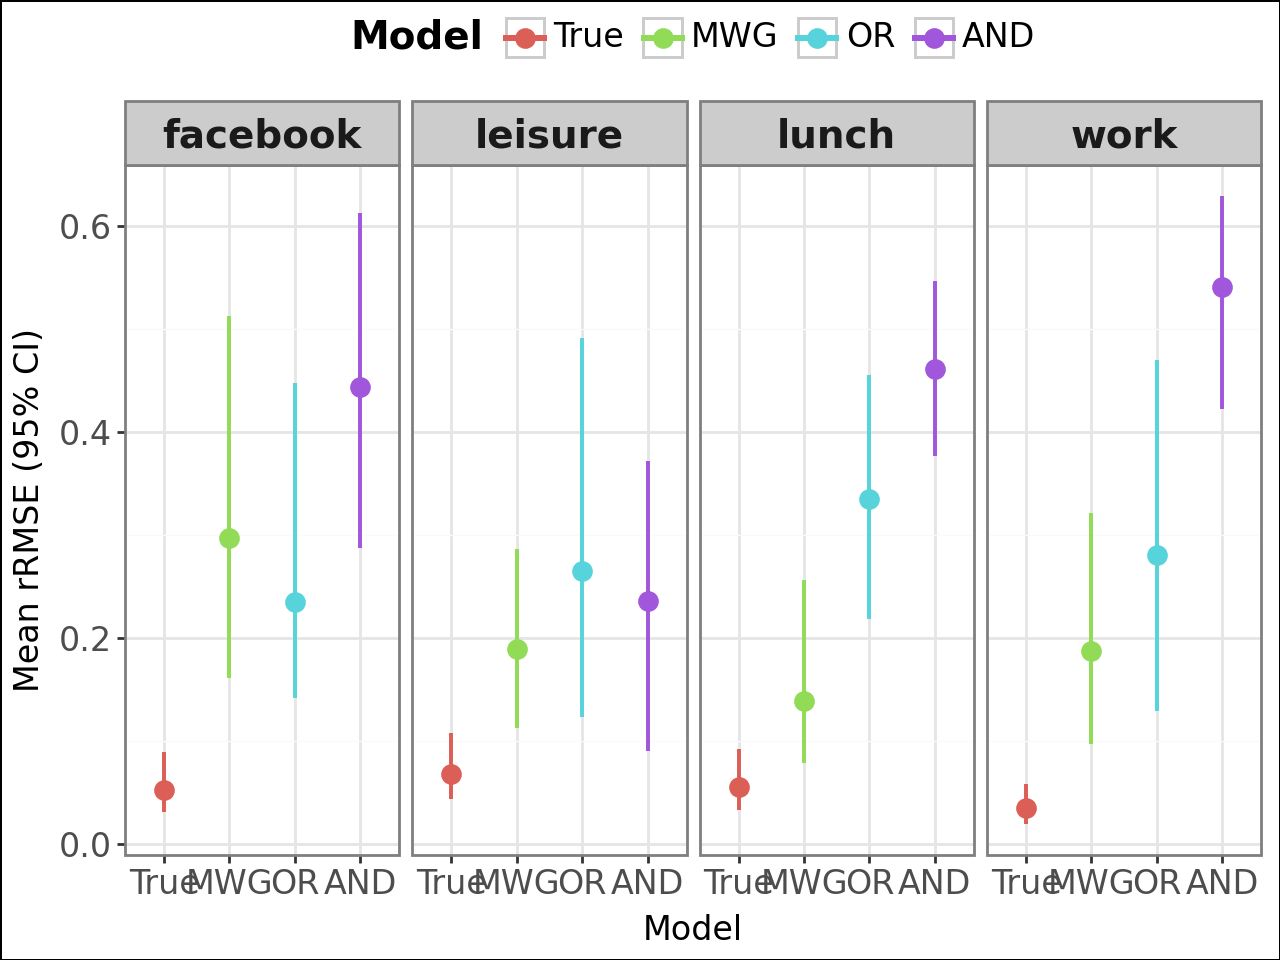

In [63]:
plot = (
    p9.ggplot(summary_df, p9.aes(x="model", 
                                 y="mean_RMSE_rel", 
                                #  y="mean_MAPE", 
                                 group="model", 
                                 color="model"))
    + p9.geom_line(position=p9.position_dodge(width=0.2), size=1.2)  
    + p9.geom_pointrange(
        p9.aes(ymin="rmse_rel_q5", ymax="rmse_rel_q95"),
        # p9.aes(ymin="mape_q5", ymax="mape_q95"),
        position=p9.position_dodge(width=0.2),
        size=0.8  
    )
    + p9.theme_bw()
    # + p9.theme_tufte()
    # + p9.scale_y_continuous(breaks=np.arange(0, 1.2, 0.2), limits=[0, 1])
    + p9.facet_wrap("layer", scales="fixed", ncol=4)

    + p9.labs(y="Mean rRMSE (95% CI)", x="Model", color="Method")
    # + p9.scale_x_continuous(breaks=summary_df["gamma_noise"].unique())

    + p9.scale_color_discrete(name="Model")
    # + p9.scale_color_manual(values=custom_palette)
    + p9.theme(
        legend_title=p9.element_text(size=14, weight='bold'),
        legend_text=p9.element_text(size=12),
        axis_title_x=p9.element_text(size=12,),
        axis_title_y=p9.element_text(size=12,),
        axis_text_x=p9.element_text(size=12),
        axis_text_y=p9.element_text(size=12),
        strip_text=p9.element_text(size=14, weight='bold'), 
        legend_position="top", 
    )
)

plot.show()

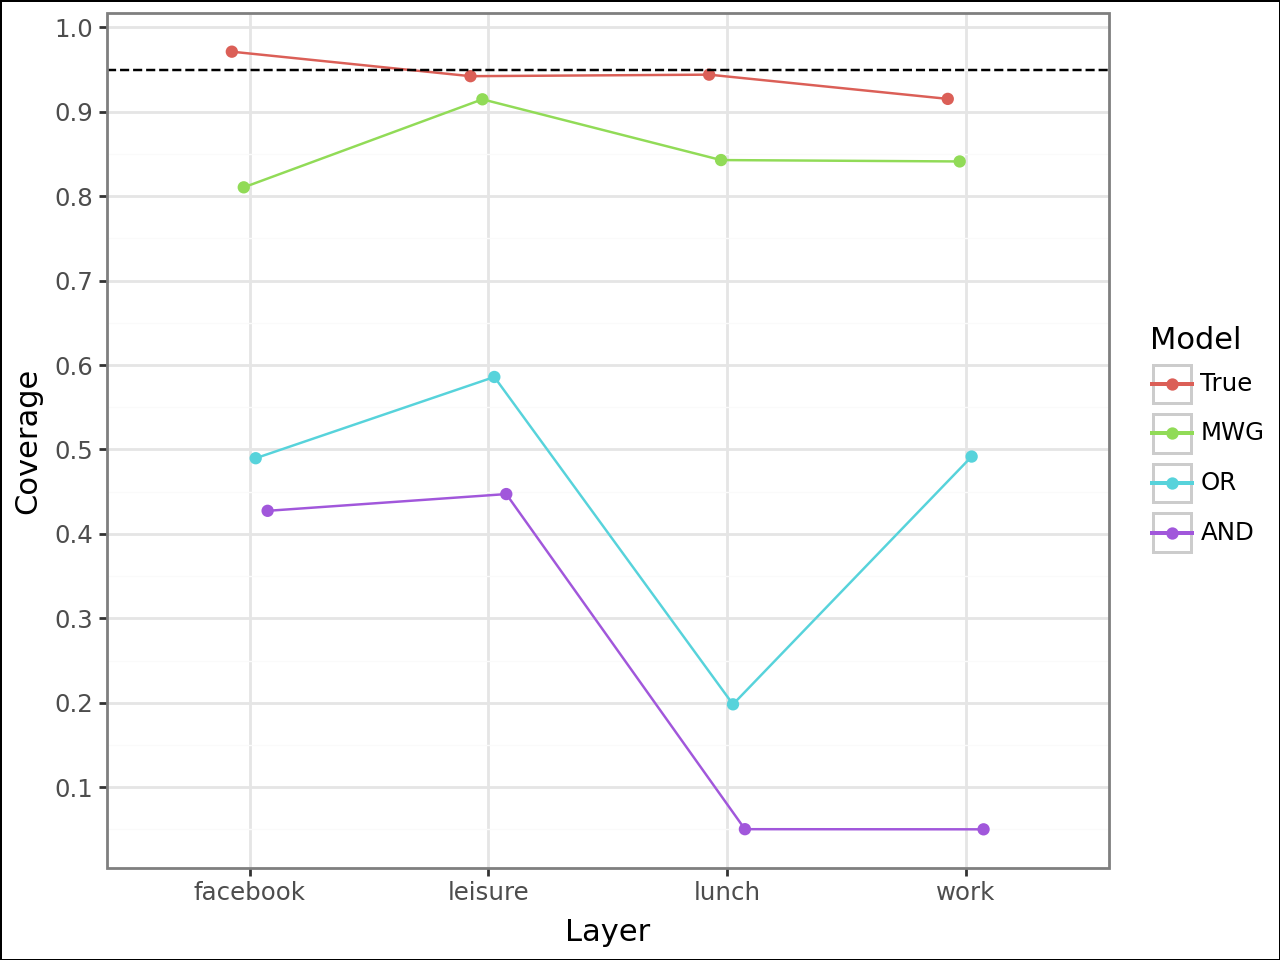

In [45]:
(
    p9.ggplot(summary_df, p9.aes(x="layer", 
                                # y="cover", 
                                y="ind_cover", 
                                group="model",
                                color="model"))
    + p9.geom_line(position=p9.position_dodge(width=0.2))
    + p9.geom_point(position=p9.position_dodge(width=0.2))
    + p9.geom_hline(yintercept=0.95, linetype="dashed")
    + p9.theme_bw()
    # + p9.facet_wrap("estimand", scales="fixed")
    # + p9.facet_wrap("estimand", scales="free_y")
    + p9.labs(y="Coverage", x="Layer")
    # + p9.scale_x_continuous(breaks=summary_df["gamma_noise"].unique())
    + p9.scale_y_continuous(breaks=np.arange(0, 1.1, 0.1))
    + p9.scale_color_discrete(name="Model")
)


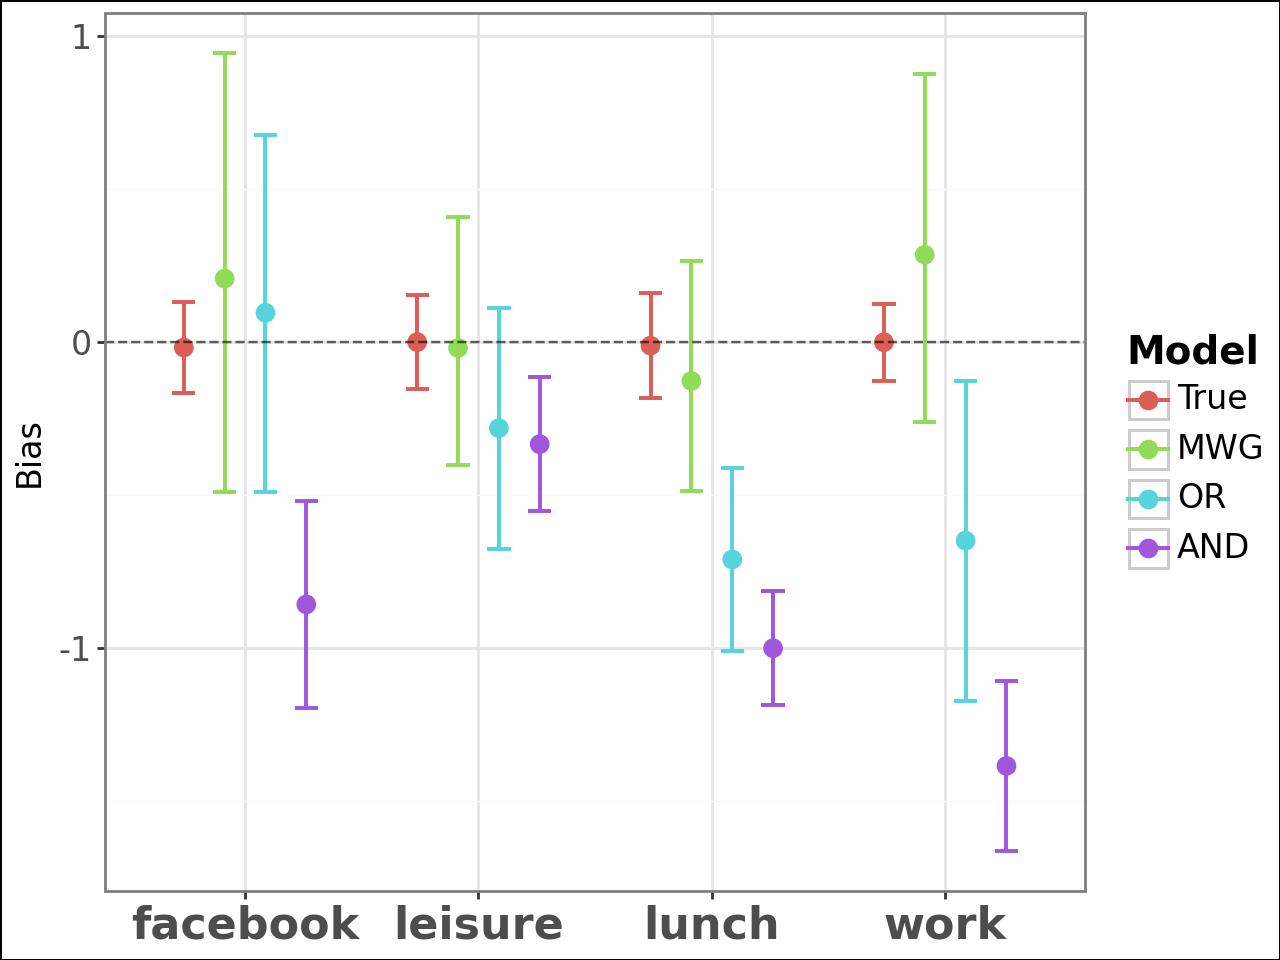

In [48]:



summary_df["bias_q975"] = summary_df["mean_975"] - summary_df["true"]
summary_df["bias_q025"] = summary_df["mean_025"] - summary_df["true"]

summary_df["bias_perc"] = summary_df["bias"] / summary_df["true"]

summary_df["bias_perc_q975"] = summary_df["bias_q975"] / summary_df["true"]
summary_df["bias_perc_q025"] = summary_df["bias_q025"] / summary_df["true"]


(
    # p9.ggplot(summary_df[summary_df["model"] != "true_net"], 
    p9.ggplot(summary_df, 
                        p9.aes(x="layer", 
                                y="bias", 
                                # y="bias_perc", 
                                group="model",
                                color="model"))
    # + p9.geom_line(size=1)
    # + p9.geom_ribbon(p9.aes(ymin="bias_q025", ymax="bias_q975"),
                          #  alpha=0.4,
                        #  outline_type = "none")
    + p9.geom_errorbar(
        p9.aes(ymin="bias_q025", ymax="bias_q975"),
        # p9.aes(ymin="bias_perc_q025", ymax="bias_perc_q975"),
        position=p9.position_dodge(width=0.7),
        size=0.8, width=0.4  
    )
    + p9.geom_point(size=3, 
                 position = p9.position_dodge(width=0.7))
    + p9.geom_hline(yintercept=0.0, linetype="dashed", color="black", alpha=0.6)
    + p9.theme_bw()
    # + p9.facet_wrap("layer", scales="fixed")
    + p9.labs(y="Bias", x="")
    # + p9.coord_flip()
    # + p9.scale_x_continuous(breaks=summary_df["gamma_noise"].unique())
    # + p9.scale_y_continuous(breaks=np.arange(-1.0, 0.2, 0.1))
    + p9.scale_color_discrete(name="Model")
    # + p9.scale_fill_discrete(name="Model")
    + p9.theme(
        legend_title=p9.element_text(size=14, weight='bold'),
        legend_text=p9.element_text(size=12),
        axis_title_x=p9.element_text(size=12,),
        axis_title_y=p9.element_text(size=12,),
        axis_text_x=p9.element_text(size=16, weight="bold"),
        axis_text_y=p9.element_text(size=12),
        strip_text=p9.element_text(size=14, weight='bold'),  
    )
)